# AFRICA FOOD PRODUCTION AND FOOD SUPPLY ANALYSIS (2004-2013)

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np



## Data Extraction

In [2]:
url1 = r"C:\Users\Anih Nathan\OneDrive\Desktop\stage D data\fprod.csv"
url2 = r"C:\Users\Anih Nathan\OneDrive\Desktop\stage D data\fsupp.csv"

In [3]:
foodprod = pd.read_csv(url1)
foodsupp = pd.read_csv(url2)

# FOOD PRODUCTION

In [4]:
foodprod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


### Data Cleaning - Check for zero productions which will add no value to our analysis

In [5]:
foodprod[foodprod['Value']==0]

,Country,Item,Year,Value
10,Algeria,Rice (Milled Equivalent),2004,0
11,Algeria,Rice (Milled Equivalent),2005,0
12,Algeria,Rice (Milled Equivalent),2006,0
13,Algeria,Rice (Milled Equivalent),2007,0
14,Algeria,Rice (Milled Equivalent),2008,0
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


### Filter out Rows with zero production

In [6]:
foodprod = foodprod[foodprod['Value']>0]


In [7]:
foodprod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23095,Zimbabwe,Freshwater Fish,2009,13
23096,Zimbabwe,Freshwater Fish,2010,13
23097,Zimbabwe,Freshwater Fish,2011,18
23098,Zimbabwe,Freshwater Fish,2012,18


In [8]:
foodprod.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20393 entries, 0 to 23099
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  20393 non-null  object
 1   Item     20393 non-null  object
 2   Year     20393 non-null  int64 
 3   Value    20393 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 796.6+ KB


In [9]:
#convert year to object
foodprod['Year'] = foodprod.Year.astype(object)

C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3808749352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foodprod['Year'] = foodprod.Year.astype(object)


In [10]:
foodprod.describe(include="all")

,Country,Item,Year,Value
count,20393,20393,20393.0,20393.000000
unique,45,94,10.0,NaN
top,United Republic of Tanzania,"Vegetables, Other",2012.0,NaN
freq,749,450,2058.0,NaN
mean,NaN,NaN,NaN,371.456676
std,NaN,NaN,NaN,1706.966252
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,6.000000
50%,NaN,NaN,NaN,27.000000
75%,NaN,NaN,NaN,141.000000


### Analysis of each column in the food production dataset

In [11]:
for column in foodprod.columns:
    print('\nColumn:',column)
    print('Unique Values:',foodprod[column].nunique())
    print('Value counts:')
    print(foodprod[column].value_counts().head())


Column: Country
Unique Values: 45
Value counts:
United Republic of Tanzania    749
South Africa                   725
Kenya                          690
Morocco                        684
Egypt                          658
Name: Country, dtype: int64

Column: Item
Unique Values: 94
Value counts:
Vegetables, Other          450
Fruits, Other              450
Milk - Excluding Butter    440
Bovine Meat                439
Eggs                       436
Name: Item, dtype: int64

Column: Year
Unique Values: 10
Value counts:
2012    2058
2013    2056
2011    2049
2010    2046
2008    2044
Name: Year, dtype: int64

Column: Value
Unique Values: 2133
Value counts:
1    1714
2    1091
3     864
4     706
6     552
Name: Value, dtype: int64


### TREND OF FOOD PRODUCTION OVER YEARS

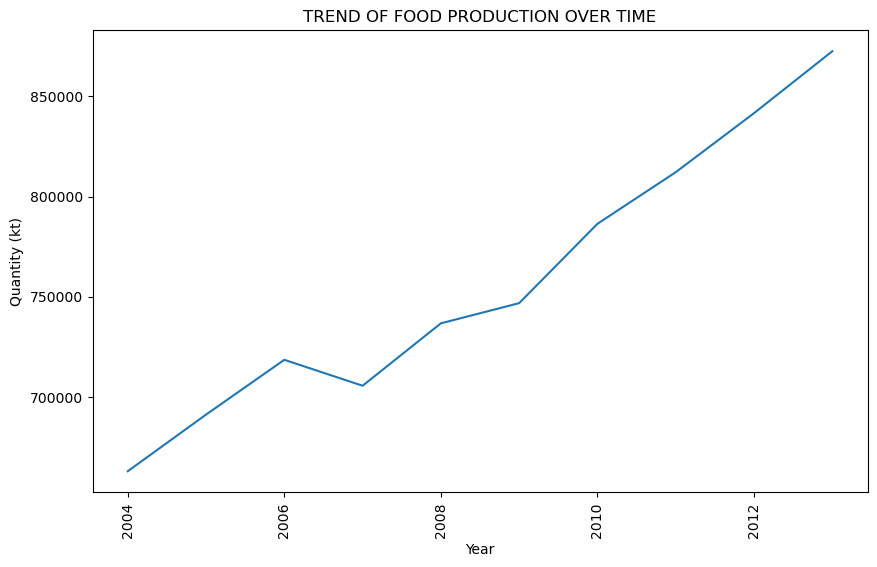

In [12]:
foodTrend = foodprod.groupby(['Year'])["Value"].sum()
plt.figure(figsize=(10,6))
sb.lineplot(foodTrend)
plt.title("TREND OF FOOD PRODUCTION OVER TIME")
plt.ylabel("Quantity (kt)")
plt.xticks(rotation=90)
plt.show()

## Total metric tons of food produced in Africa

In [13]:
foodprod['Value'].sum()

7575116

### Top Food Producing Nations for Each Year

In [14]:

foodprod[foodprod["Country"]=="Algeria"].sort_values(by=["Value"], ascending= False).head(50)

,Country,Item,Year,Value
79,Algeria,Potatoes and products,2013,4928
279,Algeria,"Vegetables, Other",2013,4472
78,Algeria,Potatoes and products,2012,4219
278,Algeria,"Vegetables, Other",2012,4068
77,Algeria,Potatoes and products,2011,3862
277,Algeria,"Vegetables, Other",2011,3666
276,Algeria,"Vegetables, Other",2010,3499
8,Algeria,Wheat and products,2012,3432
76,Algeria,Potatoes and products,2010,3300
9,Algeria,Wheat and products,2013,3299


In [15]:
#2004
foodprod_2004 = foodprod[foodprod["Year"]==2004].sort_values(by=["Value"], ascending= False).head()
foodprod_2004

,Country,Item,Year,Value
15440,Nigeria,Cassava and products,2004,38845
15470,Nigeria,Yams,2004,31776
17870,South Africa,Sugar cane,2004,19095
5750,Egypt,Sugar cane,2004,16230
7770,Ghana,Cassava and products,2004,9739


In [16]:
foodprod_2004.groupby('Country')['Value'].sum()

Country
Egypt           16230
Ghana            9739
Nigeria         70621
South Africa    19095
Name: Value, dtype: int64

In [17]:
#2005
foodprod_2005=foodprod[foodprod["Year"]==2005].sort_values(by=["Value"], ascending= False).head()
foodprod_2005

,Country,Item,Year,Value
15441,Nigeria,Cassava and products,2005,41565
15471,Nigeria,Yams,2005,34000
17871,South Africa,Sugar cane,2005,21265
5751,Egypt,Sugar cane,2005,16317
17791,South Africa,Maize and products,2005,11716


In [18]:
foodprod_2005.groupby('Country')['Value'].sum()

Country
Egypt           16317
Nigeria         75565
South Africa    32981
Name: Value, dtype: int64

In [19]:
#2006
foodprod_2006=foodprod[foodprod["Year"]==2006].sort_values(by=["Value"], ascending= False).head()
foodprod_2006

,Country,Item,Year,Value
15442,Nigeria,Cassava and products,2006,45721
15472,Nigeria,Yams,2006,36720
17872,South Africa,Sugar cane,2006,20275
5752,Egypt,Sugar cane,2006,16656
15422,Nigeria,Sorghum and products,2006,9866


In [20]:
foodprod_2006.groupby('Country')['Value'].sum()

Country
Egypt           16656
Nigeria         92307
South Africa    20275
Name: Value, dtype: int64

In [21]:
#2007
foodprod[foodprod["Year"]==2007].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15443,Nigeria,Cassava and products,2007,43410
15473,Nigeria,Yams,2007,31136
17873,South Africa,Sugar cane,2007,19724
5753,Egypt,Sugar cane,2007,17014
7773,Ghana,Cassava and products,2007,10218


In [22]:
#2008
foodprod[foodprod["Year"]==2008].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15444,Nigeria,Cassava and products,2008,44582
15474,Nigeria,Yams,2008,35017
17874,South Africa,Sugar cane,2008,19255
5754,Egypt,Sugar cane,2008,16470
17794,South Africa,Maize and products,2008,12700


In [23]:
#2009
foodprod[foodprod["Year"]==2009].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15445,Nigeria,Cassava and products,2009,36822
15475,Nigeria,Yams,2009,29092
17875,South Africa,Sugar cane,2009,18655
5755,Egypt,Sugar cane,2009,15482
635,Angola,Cassava and products,2009,12828


In [24]:
#2010
foodprod[foodprod["Year"]==2010].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15446,Nigeria,Cassava and products,2010,42533
15476,Nigeria,Yams,2010,34162
17876,South Africa,Sugar cane,2010,16016
5756,Egypt,Sugar cane,2010,15709
636,Angola,Cassava and products,2010,13859


In [25]:
#2011
foodprod[foodprod["Year"]==2011].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15447,Nigeria,Cassava and products,2011,52403
15477,Nigeria,Yams,2011,37116
17877,South Africa,Sugar cane,2011,16800
5757,Egypt,Sugar cane,2011,15765
637,Angola,Cassava and products,2011,14334


In [26]:
#2012
foodprod[foodprod["Year"]==2012].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000
15478,Nigeria,Yams,2012,40000
17878,South Africa,Sugar cane,2012,17278
5758,Egypt,Sugar cane,2012,15550
7778,Ghana,Cassava and products,2012,14547


In [27]:
#2013
foodprod[foodprod["Year"]==2013].sort_values(by=["Value"], ascending= False).head()

,Country,Item,Year,Value
15449,Nigeria,Cassava and products,2013,53000
15479,Nigeria,Yams,2013,40500
17879,South Africa,Sugar cane,2013,20033
639,Angola,Cassava and products,2013,16412
7779,Ghana,Cassava and products,2013,15990


#### Food production for each Year

In [28]:
#Total Food Production for each year 
TotalFood=foodprod.groupby('Year')['Value'].sum().reset_index(name="Total Produced")
TotalFood

,Year,Total Produced
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


In [29]:
#from geopy.exc import GeocoderTimedOut
#from geopy.geocoders import Nominatim
# longitude = []
# latitude = []
# def findGeocode(country):
#     try:
#         geolocator = Nominatim(user_agent="your_app_name")
#         return geolocator.geocode(country)
#     except GeocoderTimedOut:
#         return findGeocode(country)
# for i in (foodprod["Country"]):
#     if findGeocode(i) != None:
#         loc = findGeocode(i)
#         latitude.append(loc.latitude)
#         longitude.append(loc.longitude)
#     else:
#         latitude.append(np.nan)
#         longitude.append(np.nan)


In [32]:
foodprod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23095,Zimbabwe,Freshwater Fish,2009,13
23096,Zimbabwe,Freshwater Fish,2010,13
23097,Zimbabwe,Freshwater Fish,2011,18
23098,Zimbabwe,Freshwater Fish,2012,18


### Overall Food Production capabiity for Each Country

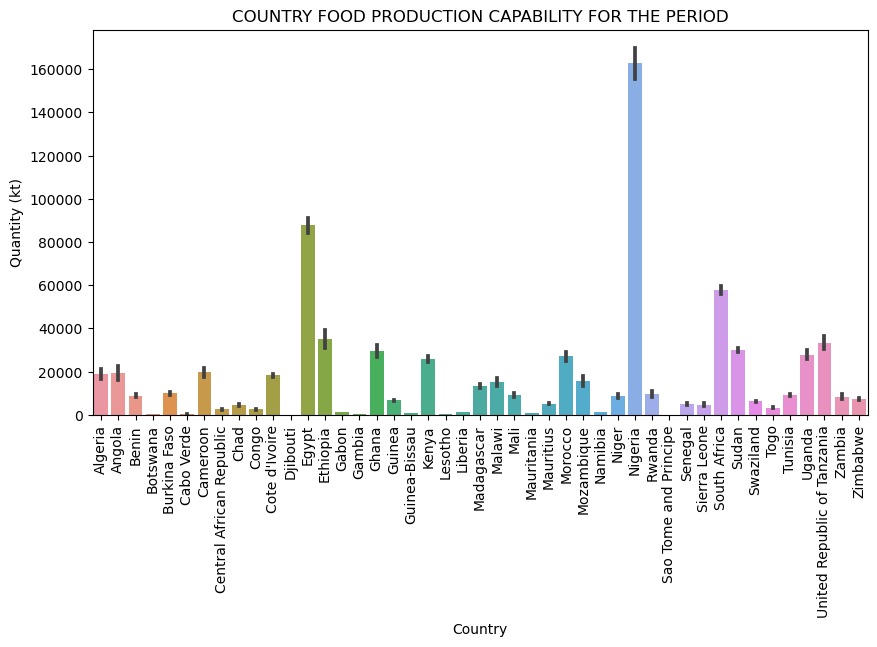

In [34]:
plt.figure(figsize=(10,5))
quantity = foodprod.groupby(['Year','Country'])['Value'].sum().unstack()
sb.barplot(quantity)
plt.title("COUNTRY FOOD PRODUCTION CAPABILITY FOR THE PERIOD")
plt.ylabel("Quantity (kt)")
plt.xticks(rotation=90)
plt.show()

In [35]:
foodprod.groupby('Country')['Value'].sum().sort_values(ascending=False)

Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Cameroon                        197670
Angola                          195499
Algeria                         188650
Cote d'Ivoire                   182486
Mozambique                      157584
Malawi                          153717
Madagascar                      133071
Burkina Faso                    100129
Rwanda                           95174
Tunisia                          92713
Mali                             92292
Benin                            88072
Niger                            86808
Zambia                           82701
Zimbabwe                         73316
Guinea           

#### Top and least food producers

In [36]:
foodprod.groupby('Country')['Value'].sum().sort_values(ascending=False).head(10).reset_index(name="Quantity Produced")

,Country,Quantity Produced
0,Nigeria,1628030
1,Egypt,877498
2,South Africa,579592
3,Ethiopia,350693
4,United Republic of Tanzania,332802
5,Sudan,301584
6,Ghana,295004
7,Uganda,278421
8,Morocco,271821
9,Kenya,256872


In [37]:
foodprod.groupby('Country')['Value'].sum().sort_values(ascending=False).tail(10).reset_index(name="Quantity Produced")

,Country,Quantity Produced
0,Namibia,14197
1,Gabon,13566
2,Mauritania,10039
3,Guinea-Bissau,7296
4,Botswana,4808
5,Gambia,4699
6,Lesotho,3785
7,Cabo Verde,1658
8,Sao Tome and Principe,1152
9,Djibouti,666


### Number of Years A country Supplied a particular food

In [38]:
foodprod.groupby(['Country','Item']).size().reset_index(name = 'Years of Production Count')

,Country,Item,Years of Production Count
0,Algeria,Apples and products,10
1,Algeria,Barley and products,10
2,Algeria,Beans,10
3,Algeria,Beer,10
4,Algeria,Bovine Meat,10
...,...,...,...
2106,Zimbabwe,Tea (including mate),10
2107,Zimbabwe,Tomatoes and products,10
2108,Zimbabwe,"Vegetables, Other",10
2109,Zimbabwe,Wheat and products,10


### Count of varieties of food produced in each country

In [39]:
foodvariety = foodprod.groupby(['Country'])['Item'].nunique().sort_values().reset_index(name = 'No. of Varieties Produced')
foodvariety

,Country,No. of Varieties Produced
0,Djibouti,14
1,Sao Tome and Principe,17
2,Lesotho,21
3,Cabo Verde,25
4,Botswana,27
5,Gambia,32
6,Swaziland,33
7,Mauritius,34
8,Mauritania,35
9,Gabon,36


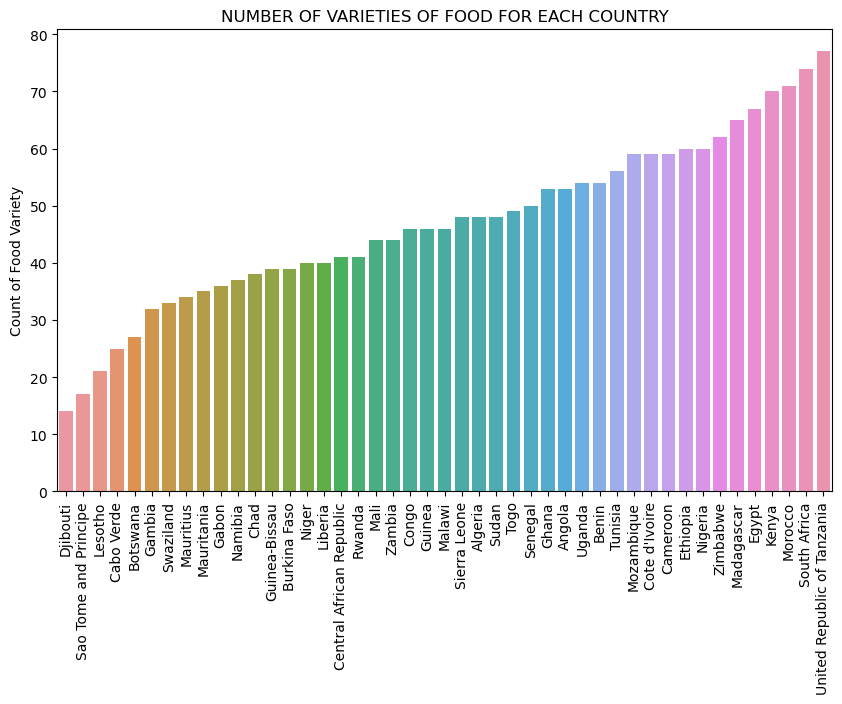

In [42]:
#xvariety=foovariety['Country'].
plt.figure(figsize=(10,6))
sb.barplot(x = foodvariety['Country'].values, y=foodvariety['No. of Varieties Produced'].values)
plt.title("NUMBER OF VARIETIES OF FOOD FOR EACH COUNTRY")
plt.ylabel("Count of Food Variety")
plt.xticks(rotation=90)
plt.show()

In [43]:
foodprod[foodprod['Country']=="Nigeria"].nunique()

Country      1
Item        60
Year        10
Value      418
dtype: int64

## ABERAGE MEAN AND INTERQUATILES OF FOOD PRODUCTION

### Average Food Production per Country

In [44]:
Averageproduction_Bycountry = foodprod.groupby('Country')['Value'].mean()
Averageproduction_Bycountry 

Country
Algeria                         406.573276
Angola                          376.684008
Benin                           166.803030
Botswana                         20.459574
Burkina Faso                    257.401028
Cabo Verde                        7.468468
Cameroon                        340.810345
Central African Republic         61.992537
Chad                            119.570292
Congo                            56.933775
Cote d'Ivoire                   321.844797
Djibouti                          5.644068
Egypt                          1333.583587
Ethiopia                        592.386824
Gabon                            40.984894
Gambia                           16.092466
Ghana                           566.226488
Guinea                          145.956332
Guinea-Bissau                    19.508021
Kenya                           372.278261
Lesotho                          18.463415
Liberia                          38.169271
Madagascar                      207.275701
Mal

<Axes: >

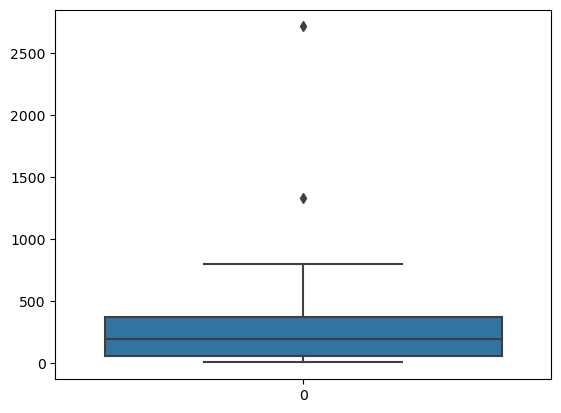

In [48]:
sb.boxplot(Averageproduction_Bycountry)

### Average Food Production by Year

In [49]:
Averageproduction_ByYear = foodprod.groupby('Year')['Value'].mean().reset_index(name="Average food production")
Averageproduction_ByYear

,Year,Average food production
0,2004,329.198610
1,2005,341.530138
2,2006,354.515047
3,2007,346.590864
4,2008,360.471624
5,2009,366.292300
6,2010,384.391984
7,2011,396.395315
8,2012,408.973275
9,2013,424.402237


<Axes: ylabel='Average food production'>

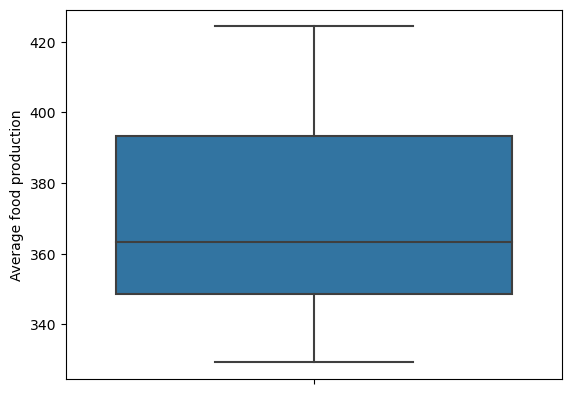

In [50]:
sb.boxplot(y = "Average food production", data =Averageproduction_ByYear)

### Boxplot of food production in Africa

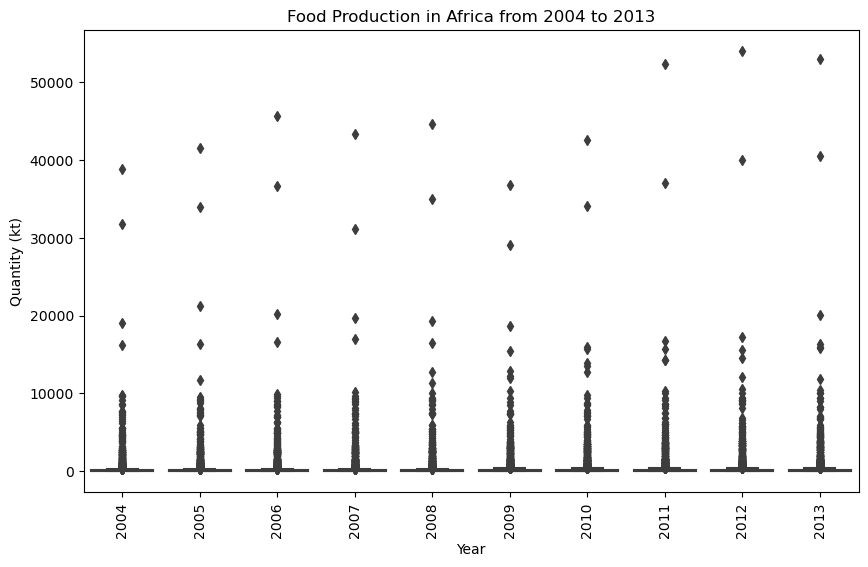

In [52]:
plt.figure(figsize=(10,6))
sb.boxplot(x="Year", y="Value", data= foodprod)
plt.title("Food Production in Africa from 2004 to 2013")
plt.ylabel("Quantity (kt)")
plt.xticks(rotation=90)
plt.show()

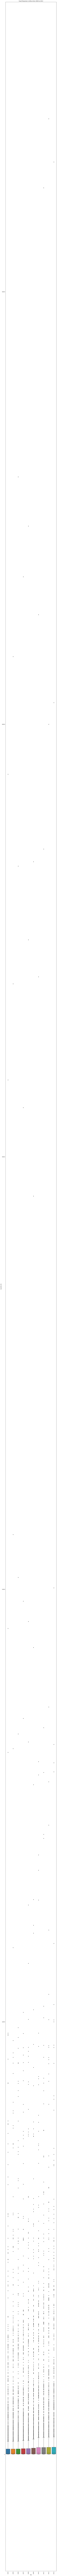

In [53]:
plt.figure(figsize=(10,505))
sb.boxplot(x="Year", y="Value", data= foodprod)
plt.title("Food Production in Africa from 2004 to 2013")
plt.ylabel("Quantity (kt)")
plt.xticks(rotation=90)
plt.show()

In [54]:
foodprod['Value'].count()

20393

### Count of food productions greate than of equal to 1kt

In [55]:
foodprod[foodprod['Value']>=1].count()

Country    20393
Item       20393
Year       20393
Value      20393
dtype: int64

### mean and median values

In [56]:
#Median Calculation
all_median = foodprod.groupby(['Year'])['Year'].count().reset_index(name="Count")

for i in all_median['Year']:
    print(foodprod[foodprod['Year']==i].median())

Year     2004.0
Value      24.0
dtype: float64
Year     2005.0
Value      25.0
dtype: float64
Year     2006.0
Value      25.0
dtype: float64
Year     2007.0
Value      25.0
dtype: float64
Year     2008.0
Value      26.0
dtype: float64
Year     2009.0
Value      29.0
dtype: float64
Year     2010.0
Value      30.0
dtype: float64
Year     2011.0
Value      30.0
dtype: float64
Year     2012.0
Value      30.0
dtype: float64
Year     2013.0
Value      30.0
dtype: float64


C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3674064409.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].median())
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3674064409.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].median())
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3674064409.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. I

In [57]:
#mean Calculation
all_mean = foodprod.groupby(['Year'])['Year'].count().reset_index(name="Count")

for i in all_mean['Year']:
    print(foodprod[foodprod['Year']==i].mean())

Year     2004.00000
Value     329.19861
dtype: float64
Year     2005.000000
Value     341.530138
dtype: float64
Year     2006.000000
Value     354.515047
dtype: float64
Year     2007.000000
Value     346.590864
dtype: float64
Year     2008.000000
Value     360.471624
dtype: float64
Year     2009.0000
Value     366.2923
dtype: float64
Year     2010.000000
Value     384.391984
dtype: float64
Year     2011.000000
Value     396.395315
dtype: float64
Year     2012.000000
Value     408.973275
dtype: float64
Year     2013.000000
Value     424.402237
dtype: float64


C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\2078998382.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].mean())
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\2078998382.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].mean())
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\2078998382.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition

In [58]:
#foodprod.Value.quantile([0.25,0.5,0.75])
quantil = foodprod.groupby(['Year'])['Year'].count().reset_index(name="Count")

for i in quantil['Year']:
    print(foodprod[foodprod['Year']==i].quantile([0.25,0.5,0.75]))

       Value
0.25    6.00
0.50   24.00
0.75  123.75
      Value
0.25    6.0
0.50   25.0
0.75  125.0
      Value
0.25    6.0
0.50   25.0
0.75  125.5
       Value
0.25    6.00
0.50   25.00
0.75  131.25
       Value
0.25    6.00
0.50   26.00
0.75  132.75
      Value
0.25    6.0
0.50   29.0
0.75  144.5
       Value
0.25    6.00
0.50   30.00
0.75  157.75
      Value
0.25    6.0
0.50   30.0
0.75  160.0
      Value
0.25    6.0
0.50   30.0
0.75  163.0
      Value
0.25    6.0
0.50   30.0
0.75  165.0


C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3868337805.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].quantile([0.25,0.5,0.75]))
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3868337805.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].quantile([0.25,0.5,0.75]))
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\3868337805.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

In [59]:
#inter quartile range
quantilerange = foodprod.groupby(['Year'])['Year'].count().reset_index(name="Count")

for i in quantilerange['Year']:
    print(foodprod[foodprod['Year']==i].quantile(0.75)-foodprod[foodprod['Year']==i].quantile(0.25))

Value    117.75
dtype: float64
Value    119.0
dtype: float64
Value    119.5
dtype: float64
Value    125.25
dtype: float64
Value    126.75
dtype: float64
Value    138.5
dtype: float64
Value    151.75
dtype: float64
Value    154.0
dtype: float64
Value    157.0
dtype: float64
Value    159.0
dtype: float64


C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_7500\270168854.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(foodprod[foodprod['Year']==i].quantile(0.75)-foodprod[foodprod['Year']==i].quantile(0.25))


### A closer look at 2021

In [60]:
#2012
foodprod_2012=foodprod[foodprod["Year"]==2012].sort_values(by=["Value"],ascending= False)
foodprod_2012

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000
15478,Nigeria,Yams,2012,40000
17878,South Africa,Sugar cane,2012,17278
5758,Egypt,Sugar cane,2012,15550
7778,Ghana,Cassava and products,2012,14547
...,...,...,...,...
1818,Botswana,Cottonseed,2012,1
7558,Gambia,Mutton & Goat Meat,2012,1
10538,Liberia,"Offals, Edible",2012,1
18228,South Africa,Tea (including mate),2012,1


In [61]:
foodprod_2012=foodprod_2012.groupby(['Country','Year'])['Value'].sum().sort_values(ascending=False).reset_index(name="Qauntity")


foodprod_2012

,Country,Year,Qauntity
0,Nigeria,2012,178816
1,Egypt,2012,96139
2,South Africa,2012,59581
3,Ethiopia,2012,44142
4,United Republic of Tanzania,2012,38956
5,Ghana,2012,34860
6,Kenya,2012,28851
7,Sudan,2012,26373
8,Morocco,2012,26236
9,Uganda,2012,25711


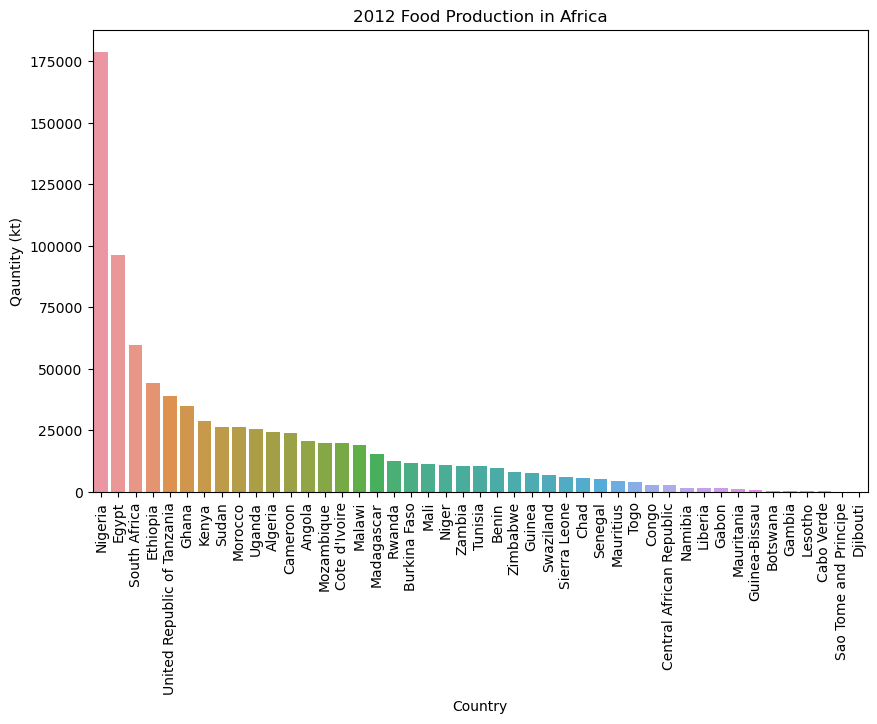

In [64]:

plt.figure(figsize=(10,6))
sb.barplot(x="Country", y="Qauntity", data=foodprod_2012)
plt.ylabel("Qauntity (kt)")
plt.title("2012 Food Production in Africa")
plt.xticks(rotation=90)
plt.show()

### Food Most Produced

In [65]:
topproduce =  foodprod.groupby(['Item'])['Value'].sum().nlargest(15).reset_index(name = 'Quantity Produced')
topproduce

,Item,Quantity Produced
0,Cassava and products,1118948
1,Sugar cane,887008
2,Maize and products,574948
3,Yams,511523
4,"Vegetables, Other",410403
5,Milk - Excluding Butter,380380
6,Sorghum and products,241080
7,Wheat and products,229875
8,"Beverages, Fermented",227037
9,Potatoes and products,221092


In [66]:
leastproduced = foodprod.groupby(['Item'])['Value'].sum().nsmallest(15).reset_index(name = 'Quantity Produced')
leastproduced

,Item,Quantity Produced
0,"Aquatic Animals, Others",13
1,"Fish, Liver Oil",28
2,Pepper,199
3,"Molluscs, Other",214
4,Cloves,249
5,"Fish, Body Oil",403
6,Cream,413
7,Rape and Mustard Oil,437
8,Sugar non-centrifugal,686
9,Rye and products,846


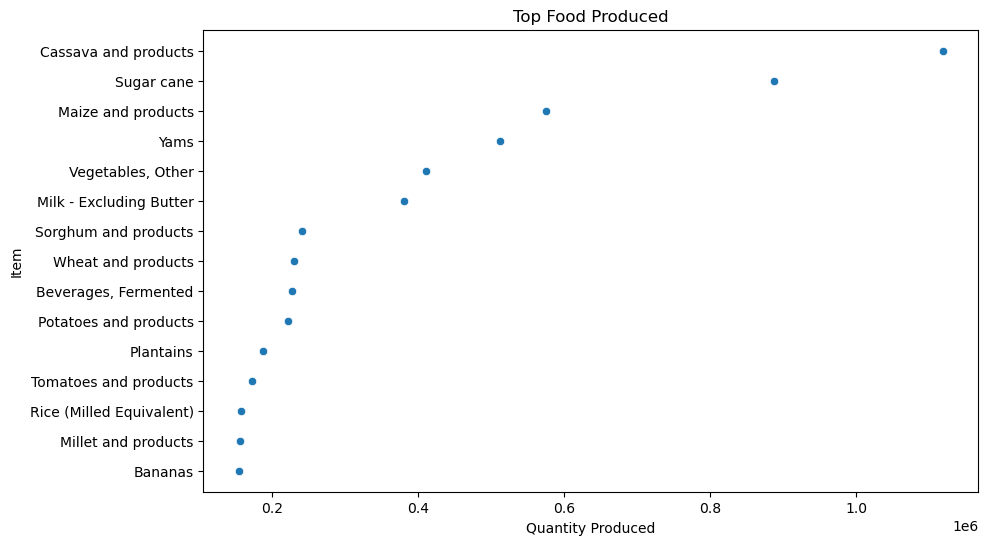

In [67]:
plt.figure(figsize=(10,6))
sb.scatterplot(y = "Item", x="Quantity Produced", data=topproduce)
plt.title("Top Food Produced")
plt.show()


## FOOD SUPPLY ANALYSIS AND PATTER RECOGNITION

In [68]:
foodsupp

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


## check for cleaning off zero supplies/consumption

In [69]:
foodsupp[foodsupp['Value']==0].sum()

Country    0.0
Year       0.0
Value      0.0
dtype: float64

In [70]:
foodsupp.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [71]:
foodsupp['Year'] = foodsupp.Year.astype(object)

In [72]:
foodsupp

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [73]:
foodsupp.describe(include="all")

,Country,Year,Value
count,450,450.0,450.000000
unique,45,10.0,NaN
top,Algeria,2004.0,NaN
freq,10,45.0,NaN
mean,NaN,NaN,2469.775556
std,NaN,NaN,379.140143
min,NaN,NaN,1781.000000
25%,NaN,NaN,2174.000000
50%,NaN,NaN,2376.000000
75%,NaN,NaN,2681.750000


In [74]:
for column in foodsupp.columns:
    print('\nColumn:',column)
    print('Unique Values:',foodprod[column].nunique())
    print('Value counts:')
    print(foodprod[column].value_counts().head())


Column: Country
Unique Values: 45
Value counts:
United Republic of Tanzania    749
South Africa                   725
Kenya                          690
Morocco                        684
Egypt                          658
Name: Country, dtype: int64

Column: Year
Unique Values: 10
Value counts:
2012    2058
2013    2056
2011    2049
2010    2046
2008    2044
Name: Year, dtype: int64

Column: Value
Unique Values: 2133
Value counts:
1    1714
2    1091
3     864
4     706
6     552
Name: Value, dtype: int64


### Food Supply Over Time

In [75]:
#Total Food Supply for Each Year
foodsupp.groupby('Year')['Value'].sum()

Year
2004    107740
2005    108418
2006    109386
2007    110149
2008    110734
2009    111700
2010    112383
2011    113194
2012    113744
2013    113951
Name: Value, dtype: int64

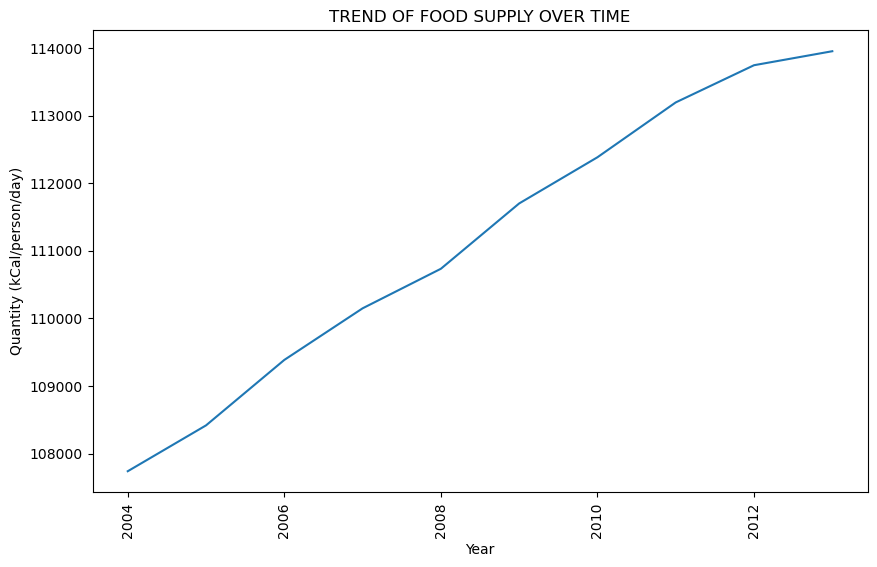

In [76]:
plt.figure(figsize=(10,6))
quantity = foodsupp.groupby(['Year'])['Value'].sum()
quantity.plot()
plt.title("TREND OF FOOD SUPPLY OVER TIME")
plt.ylabel("Quantity (kCal/person/day)")
plt.xticks(rotation=90)
plt.show()

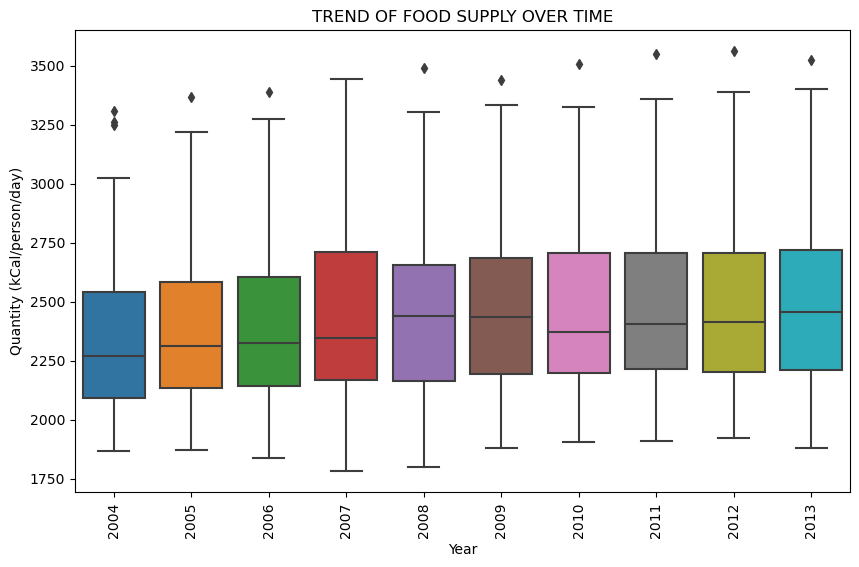

In [77]:
plt.figure(figsize=(10,6))
sb.boxplot(x="Year", y="Value", data= foodsupp)
plt.title("TREND OF FOOD SUPPLY OVER TIME")
plt.ylabel("Quantity (kCal/person/day)")
plt.xticks(rotation=90)
plt.show()

In [78]:
foodsupp[foodsupp["Year"]==2004].sort_values(by=["Value"], ascending= False).tail(3)

,Country,Year,Value
320,Rwanda,2004,1969
130,Ethiopia,2004,1882
430,Zambia,2004,1866


In [79]:
foodsupp[foodsupp["Year"]==2005].sort_values(by=["Value"], ascending= False).tail(3)

,Country,Year,Value
441,Zimbabwe,2005,2025
131,Ethiopia,2005,1978
431,Zambia,2005,1873


In [80]:
foodprod[foodprod["Item"]=="Rice (Milled Equivalent)"].sort_values(by=["Value"], ascending= False).head(30)

,Country,Item,Year,Value
5674,Egypt,Rice (Milled Equivalent),2008,4838
5673,Egypt,Rice (Milled Equivalent),2007,4587
5672,Egypt,Rice (Milled Equivalent),2006,4506
5670,Egypt,Rice (Milled Equivalent),2004,4237
5671,Egypt,Rice (Milled Equivalent),2005,4086
5678,Egypt,Rice (Milled Equivalent),2012,3943
5679,Egypt,Rice (Milled Equivalent),2013,3818
5677,Egypt,Rice (Milled Equivalent),2011,3785
5675,Egypt,Rice (Milled Equivalent),2009,3682
15398,Nigeria,Rice (Milled Equivalent),2012,3224


In [81]:
foodsupp[foodsupp["Year"]==2007].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
123,Egypt,2007,3445
403,Tunisia,2007,3252
273,Morocco,2007,3251


In [82]:
foodsupp[foodsupp["Year"]==2008].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
124,Egypt,2008,3490
404,Tunisia,2008,3302
274,Morocco,2008,3271


In [83]:
foodsupp[foodsupp["Year"]==2009].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
125,Egypt,2009,3441
405,Tunisia,2009,3335
275,Morocco,2009,3293


In [84]:
foodsupp[foodsupp["Year"]==2010].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
126,Egypt,2010,3507
406,Tunisia,2010,3326
276,Morocco,2010,3294


In [85]:
foodsupp[foodsupp["Year"]==2011].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
127,Egypt,2011,3549
407,Tunisia,2011,3360
277,Morocco,2011,3349


In [86]:
foodsupp[foodsupp["Year"]==2012].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
128,Egypt,2012,3561
408,Tunisia,2012,3390
278,Morocco,2012,3366


In [87]:
foodsupp[foodsupp["Year"]==2013].sort_values(by=["Value"], ascending= False).head(3)

,Country,Year,Value
129,Egypt,2013,3522
279,Morocco,2013,3403
409,Tunisia,2013,3349


### A Closer Attention to 2012 with the Highest Outlier

In [88]:
#food Production for 2012
supply_2012 = foodsupp[foodsupp["Year"]==2012].sort_values(by=["Value"], ascending= False)
supply_2012

,Country,Year,Value
128,Egypt,2012,3561
408,Tunisia,2012,3390
278,Morocco,2012,3366
8,Algeria,2012,3272
168,Ghana,2012,3043
368,South Africa,2012,3014
268,Mauritius,2012,3014
258,Mauritania,2012,2873
248,Mali,2012,2860
148,Gabon,2012,2795


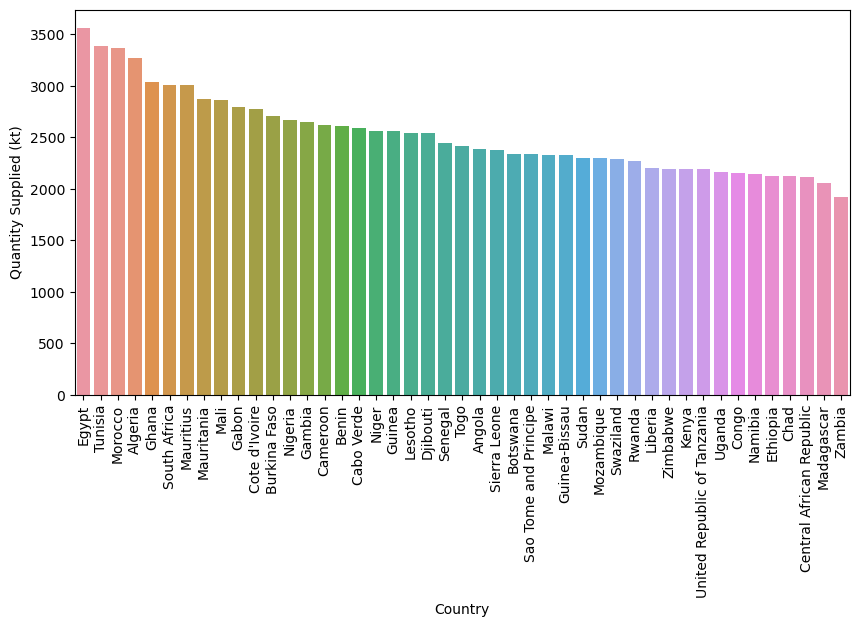

In [90]:
plt.figure(figsize=(10,5))
sb.barplot(x="Country", y="Value", data=supply_2012)
plt.ylabel("Quantity Supplied (kt)")
plt.xticks(rotation=90)
plt.show()

### Countries Food Supply  Capability

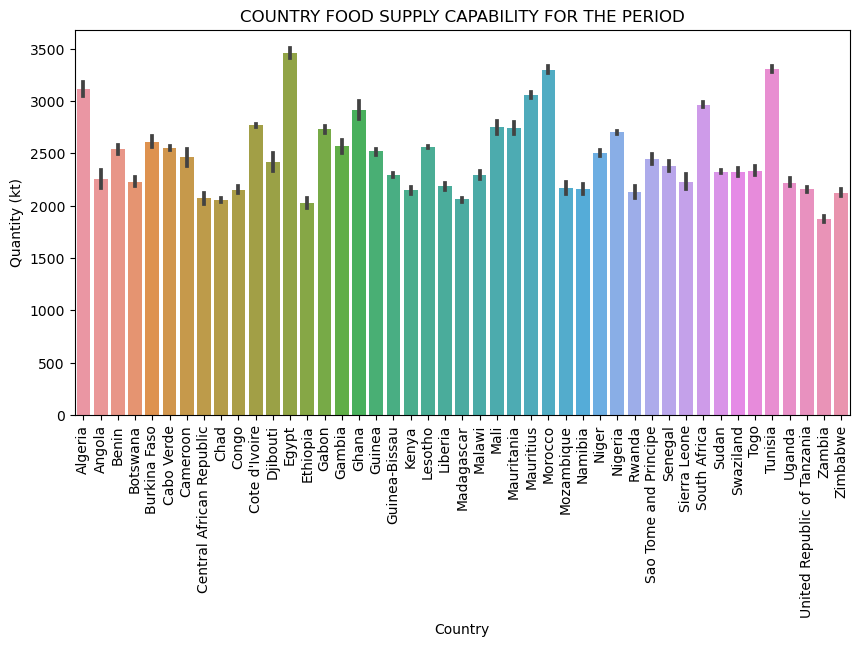

In [92]:
plt.figure(figsize=(10,5))
quantitysup = foodsupp.groupby(['Year','Country'])['Value'].sum().unstack()
sb.barplot(quantitysup)
plt.title("COUNTRY FOOD SUPPLY CAPABILITY FOR THE PERIOD")
plt.ylabel("Quantity (kt)")
plt.xticks(rotation=90)
plt.show()

In [93]:
foodsupp.groupby('Country')['Value'].sum().nlargest(20)

Country
Egypt            34580
Tunisia          33055
Morocco          32967
Algeria          31118
Mauritius        30543
South Africa     29629
Ghana            29180
Cote d'Ivoire    27666
Mali             27502
Mauritania       27443
Gabon            27299
Nigeria          26988
Burkina Faso     26072
Gambia           25695
Lesotho          25588
Cabo Verde       25514
Benin            25378
Guinea           25180
Niger            25024
Cameroon         24603
Name: Value, dtype: int64

### Countries that supplied Variety of Food Most

In [94]:
foodvariety = foodsupp.groupby('Country').size().nlargest(50).reset_index(name = 'Years of Supply Count')
foodvariety

,Country,Years of Supply Count
0,Algeria,10
1,Malawi,10
2,Mauritania,10
3,Mauritius,10
4,Morocco,10
5,Mozambique,10
6,Namibia,10
7,Niger,10
8,Nigeria,10
9,Rwanda,10


### Each Country's Average Food supply

In [95]:
Averagesupply = foodsupp.groupby('Country')['Value'].mean().sort_values()
Averagesupply

Country
Zambia                         1870.1
Ethiopia                       2029.2
Chad                           2051.1
Madagascar                     2060.8
Central African Republic       2071.9
Zimbabwe                       2120.9
Rwanda                         2130.9
Kenya                          2145.3
Congo                          2153.0
United Republic of Tanzania    2155.0
Namibia                        2160.2
Mozambique                     2170.2
Liberia                        2182.7
Uganda                         2220.5
Botswana                       2226.3
Sierra Leone                   2229.1
Angola                         2255.6
Malawi                         2292.5
Guinea-Bissau                  2296.3
Swaziland                      2317.1
Sudan                          2323.8
Togo                           2333.9
Senegal                        2378.4
Djibouti                       2416.5
Sao Tome and Principe          2446.2
Cameroon                       2460.3
Nige

## Comparison of Average Food Production and Consumption for each year

## Average Food Rpoduction for each Year

In [96]:
AverageFoodprod = foodprod.groupby('Year')['Value'].mean().reset_index(name='Average Production')
AverageFoodprod 

,Year,Average Production
0,2004,329.198610
1,2005,341.530138
2,2006,354.515047
3,2007,346.590864
4,2008,360.471624
5,2009,366.292300
6,2010,384.391984
7,2011,396.395315
8,2012,408.973275
9,2013,424.402237


Text(0, 0.5, 'Average Production/Year (kt)')

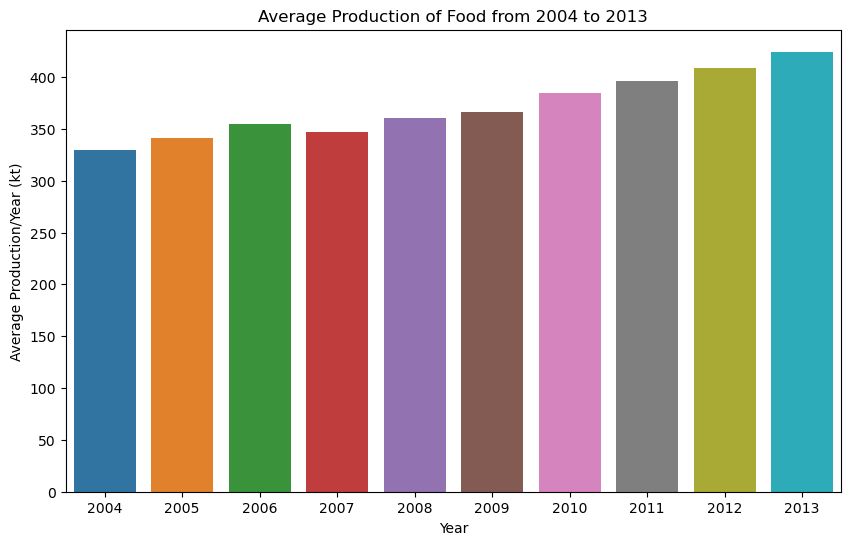

In [100]:
plt.figure(figsize=(10,6))
sb.barplot(data =AverageFoodprod,y ="Average Production", x="Year",linewidth=3)
plt.title("Average Production of Food from 2004 to 2013")
plt.ylabel( "Average Production/Year (kt)")

<Axes: ylabel='Average Production'>

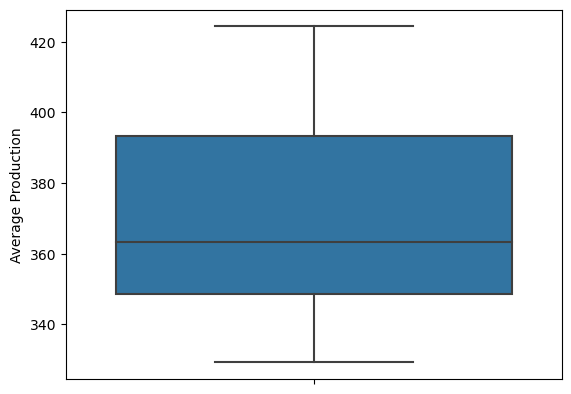

In [101]:
sb.boxplot(data =AverageFoodprod,y ="Average Production")

In [102]:
MedianFoodprod = foodprod.groupby('Year')['Value'].median().reset_index(name='Median Production')
MedianFoodprod 

,Year,Median Production
0,2004,24.0
1,2005,25.0
2,2006,25.0
3,2007,25.0
4,2008,26.0
5,2009,29.0
6,2010,30.0
7,2011,30.0
8,2012,30.0
9,2013,30.0


### Average Food Consumption for each Year

In [105]:
AverageConsumption = foodsupp.groupby('Year')['Value'].mean().reset_index(name='Average Consumption')
AverageConsumption 

,Year,Average Consumption
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556
5,2009,2482.222222
6,2010,2497.400000
7,2011,2515.422222
8,2012,2527.644444
9,2013,2532.244444


Text(0, 0.5, 'Average Consumption/Year (kCal/(person day))')

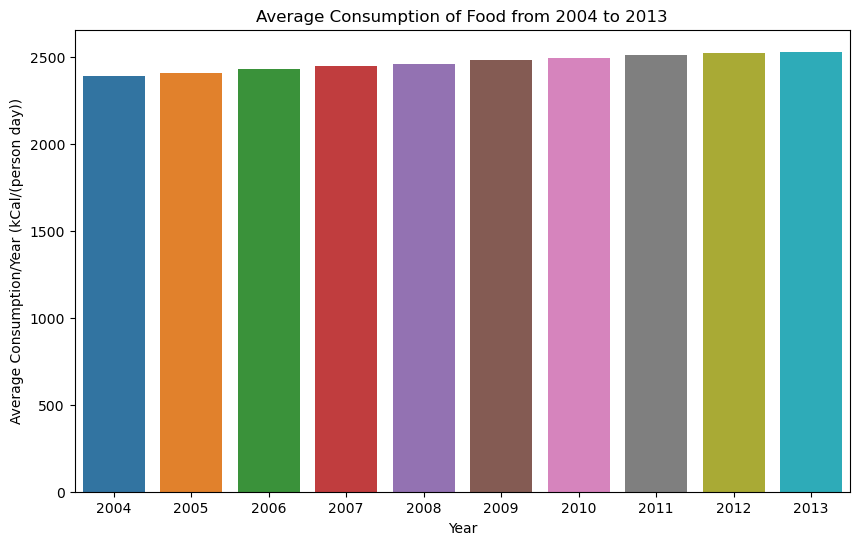

In [106]:
plt.figure(figsize=(10,6))
sb.barplot(data =AverageConsumption,y ="Average Consumption", x="Year",linewidth=3)
plt.title("Average Consumption of Food from 2004 to 2013")
plt.ylabel( "Average Consumption/Year (kCal/(person day))")

<Axes: ylabel='Average Consumption'>

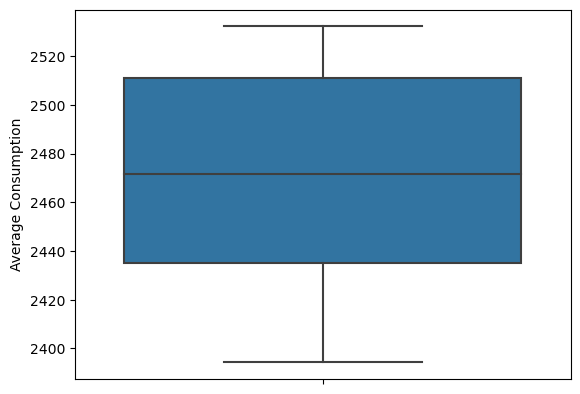

In [107]:
sb.boxplot(data =AverageConsumption,y ="Average Consumption")

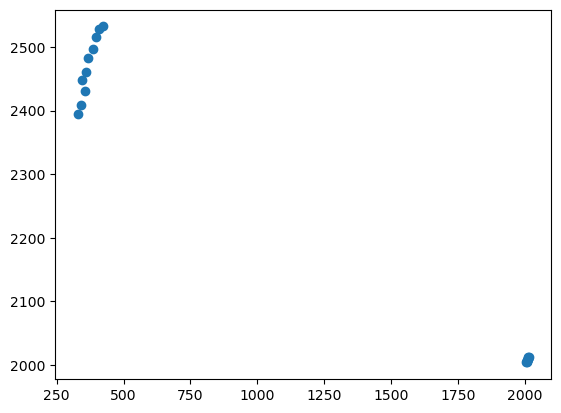

In [108]:
plt.scatter(AverageFoodprod,AverageConsumption)

In [109]:
TotalConsumption = foodsupp.groupby('Year')['Value'].sum()
TotalConsumption

Year
2004    107740
2005    108418
2006    109386
2007    110149
2008    110734
2009    111700
2010    112383
2011    113194
2012    113744
2013    113951
Name: Value, dtype: int64

In [110]:
foodsupp[foodsupp['Year']==2004].describe()

,Value
count,45.000000
mean,2394.222222
std,374.504272
min,1866.000000
25%,2092.000000
50%,2271.000000
75%,2541.000000
max,3309.000000


In [111]:
foodprod[foodprod['Year']==2004].describe()

,Value
count,2014.000000
mean,329.198610
std,1534.387299
min,1.000000
25%,6.000000
50%,24.000000
75%,123.750000
max,38845.000000


In [120]:
TotalProduction = foodprod.groupby('Year')['Value'].sum()
TotalProduction

Year
2004    663006
2005    691257
2006    718602
2007    705659
2008    736804
2009    746870
2010    786466
2011    812214
2012    841667
2013    872571
Name: Value, dtype: int64

In [121]:

oat =foodprod[foodprod["Year"]==2010].sort_values(by=["Value"], ascending= False)

In [122]:
oat[oat["Item"]=="Oats"].sort_values(by=["Value"], ascending= False)

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
9286,Kenya,Oats,2010,3
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


In [123]:
rice = foodprod.groupby("Country")["Value"].sum()
rice

Country
Algeria                         188650
Angola                          195499
Benin                            88072
Botswana                          4808
Burkina Faso                    100129
Cabo Verde                        1658
Cameroon                        197670
Central African Republic         24921
Chad                             45078
Congo                            25791
Cote d'Ivoire                   182486
Djibouti                           666
Egypt                           877498
Ethiopia                        350693
Gabon                            13566
Gambia                            4699
Ghana                           295004
Guinea                           66848
Guinea-Bissau                     7296
Kenya                           256872
Lesotho                           3785
Liberia                          14657
Madagascar                      133071
Malawi                          153717
Mali                             92292
Mauritania       

In [124]:
foodprod.groupby('Item')['Value'].sum().tail(30)

Item
Pineapples and products        30627
Plantains                     186775
Potatoes and products         221092
Poultry Meat                   41944
Pulses, Other and products     87097
Rape and Mustard Oil             437
Rape and Mustardseed            1329
Rice (Milled Equivalent)      156775
Roots, Other                  136266
Rye and products                 846
Sesame seed                    13237
Sesameseed Oil                  1287
Sorghum and products          241080
Soyabean Oil                    3727
Soyabeans                      14929
Spices, Other                   3198
Sugar (Raw Equivalent)         99546
Sugar beet                     87130
Sugar cane                    887008
Sugar non-centrifugal            686
Sunflower seed                 15597
Sunflowerseed Oil               5076
Sweet potatoes                145694
Sweeteners, Other               1744
Tea (including mate)            5589
Tomatoes and products         172192
Vegetables, Other             410